In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

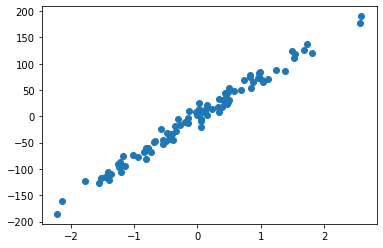

In [3]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x, y)

In [6]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [7]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.69196956,  1.        ],
       [ 0.03469322,  1.        ],
       [ 0.50322329,  1.        ],
       [ 1.02828464,  1.        ],
       [-0.42621823,  1.        ],
       [ 0.03251438,  1.        ],
       [ 0.99521036,  1.        ],
       [-0.44432946,  1.        ],
       [ 0.84913002,  1.        ],
       [-1.43105876,  1.        ],
       [ 1.23990901,  1.        ],
       [ 1.73715508,  1.        ],
       [-1.46603507,  1.        ],
       [ 0.15486688,  1.        ],
       [ 0.73837252,  1.        ],
       [ 2.56782073,  1.        ],
       [-0.02060881,  1.        ],
       [-1.35825159,  1.        ],
       [ 2.58901022,  1.        ],
       [ 0.43662875,  1.        ],
       [-1.20863612,  1.        ],
       [ 0.02093244,  1.        ],
       [ 0.45285199,  1.        ],
       [ 0.96580714,  1.        ],
       [-0.85077281,  1.        ],
       [-0.94169484,  1.        ],
       [-1.14553877,  1.        ],
       [-2.21893653,  1.        ],
       [-0.45462528,

In [8]:
theta = np.random.randn(2,1)
theta

array([[-0.56908001],
       [-0.12328312]])

# 2. Modèle linéaire

In [10]:
def model(X, theta):
    return X.dot(theta)

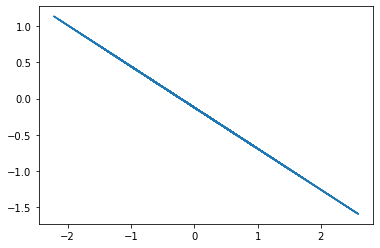

In [13]:
plt.plot(x, model(X, theta))

# 3. Fonction coût

In [14]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [15]:
cost_function(X, y, theta)

2839.053595832277

# 4. Descente de gradient

In [17]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [31]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Entrainement du modèle

In [33]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [34]:
theta_final

array([[75.68248572],
       [-1.10916111]])

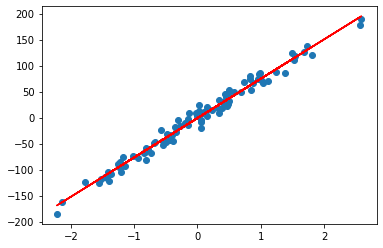

In [35]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 6. Courbe d'apprentissage

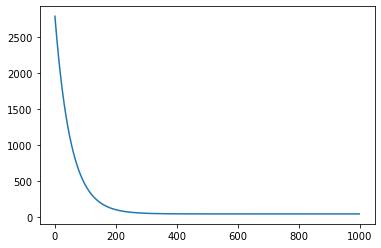

In [36]:
plt.plot(range(1000), cost_history)

# 7. Coefficient de détermination

In [39]:
def coef_determination(y, pred): 
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [40]:
coef_determination(y, predictions)

0.9829342113460382